# Máquinas de Soporte Vectorial

### Docente: M.Sc. Richard Fernández

### Comprensión del negocio 

Objetivo del negocio: Incrementar el marketshare de "Perú Bank" en el mercado de depósitos a plazo

Objetivo de ML: Predecir la probabilidad de que un cliente acepte el producto de depósito a plazo que ofrece "Perú Bank" mediante el canal de Call Center.

### Comprensión de los datos 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as ss
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay #(antes plot_confusion_matrix)
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('D:/Bases/Kaggle/Banco/bank_deposit.csv')

In [4]:
data.head()

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1


In [5]:
data.dtypes

idcliente    int64
duration     int64
previous     int64
housing      int64
campaign     int64
loan         int64
default      int64
target       int64
muestra      int64
dtype: object

In [6]:
data['housing'] = data['housing'].astype(object)
data['loan'] = data['loan'].astype(object)
data['default'] = data['default'].astype(object)

In [7]:
data.dtypes

idcliente     int64
duration      int64
previous      int64
housing      object
campaign      int64
loan         object
default      object
target        int64
muestra       int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   idcliente  10578 non-null  int64 
 1   duration   10578 non-null  int64 
 2   previous   10578 non-null  int64 
 3   housing    10578 non-null  object
 4   campaign   10578 non-null  int64 
 5   loan       10578 non-null  object
 6   default    10578 non-null  object
 7   target     10578 non-null  int64 
 8   muestra    10578 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 743.9+ KB


In [9]:
#Prueba de normalidad
#Ho: la variable se aproxima a una distribución normal
#Ha: la variable no se aproxima a una distribución normal

In [10]:
ss.shapiro(data.duration)

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.805237889289856, pvalue=0.0)

In [11]:
ss.shapiro(data.previous)

ShapiroResult(statistic=0.40508270263671875, pvalue=0.0)

In [12]:
ss.shapiro(data.campaign)

ShapiroResult(statistic=0.5598058104515076, pvalue=0.0)

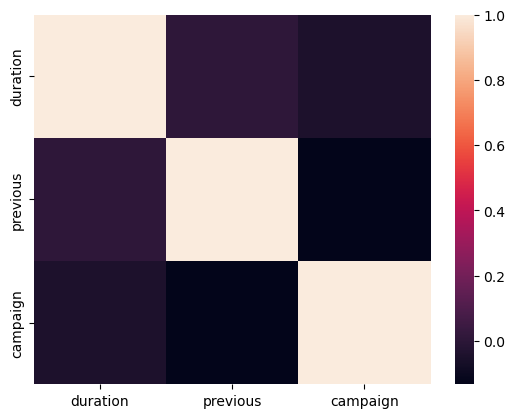

In [13]:
#Heatmap
sns.heatmap(data.loc[:,['duration','previous','campaign']].corr(method = "spearman"))
plt.show()

In [14]:
data.loc[:,['duration','previous','campaign']].corr(method = "spearman")

,duration,previous,campaign
duration,1.000000,0.007392,-0.045111
previous,0.007392,1.000000,-0.133380
campaign,-0.045111,-0.133380,1.000000


In [15]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

In [16]:
ss.spearmanr(data['duration'],data['previous'])

SignificanceResult(statistic=0.007391554527368723, pvalue=0.44717238462569875)

In [17]:
ss.spearmanr(data['duration'],data['campaign'])

SignificanceResult(statistic=-0.04511102781446181, pvalue=3.4596132567098772e-06)

In [18]:
ss.spearmanr(data['previous'],data['campaign'])

SignificanceResult(statistic=-0.13337989612024528, pvalue=3.456139168446694e-43)

In [19]:
data['target'].dtype

dtype('int64')

In [20]:
data['target'] = data['target'].astype('int64')

In [21]:
data['target'].dtype

dtype('int64')

In [22]:
data.target.value_counts()

0    5289
1    5289
Name: target, dtype: int64

In [23]:
100*data['target'].value_counts(normalize=True)

0    50.0
1    50.0
Name: target, dtype: float64

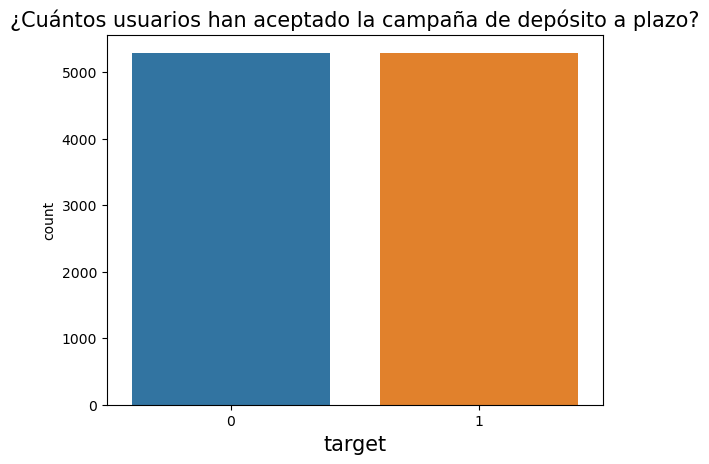

In [24]:
sns.countplot(data = data, x = 'target')
plt.xlabel('target', fontsize = 15)
plt.title('¿Cuántos usuarios han aceptado la campaña de depósito a plazo?', fontsize = 15)
plt.show()

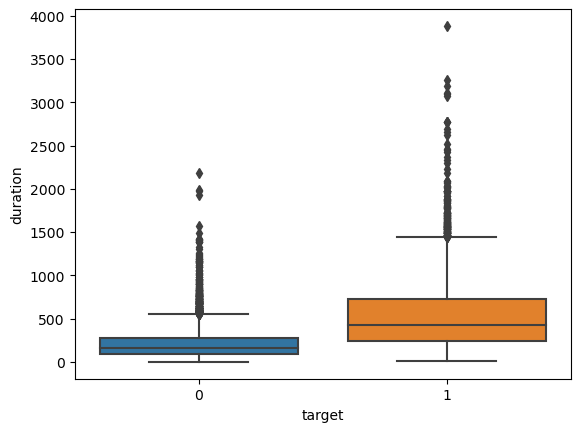

In [25]:
sns.boxplot(x='target',y='duration',data=data)
plt.show()

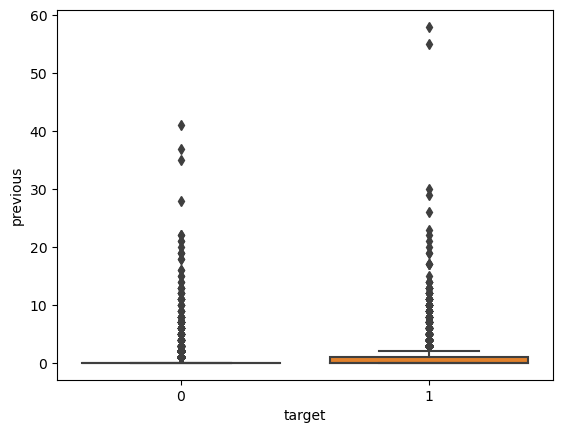

In [26]:
sns.boxplot(x='target',y='previous',data=data)
plt.show()

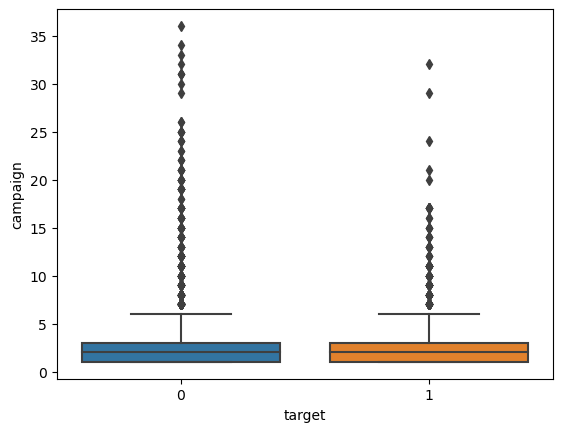

In [27]:
sns.boxplot(x='target',y='campaign',data=data)
plt.show()

housing     0     1
target             
0        2176  3113
1        3354  1935


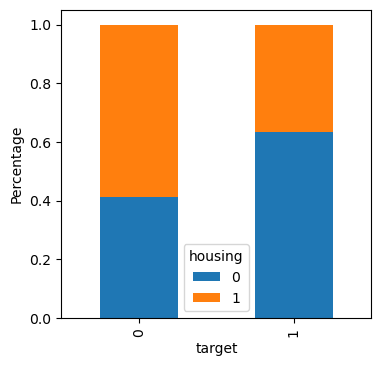

In [28]:
print(pd.crosstab(data["target"],data["housing"]))
t = pd.crosstab(data["target"],data["housing"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

loan       0    1
target           
0       4359  930
1       4805  484


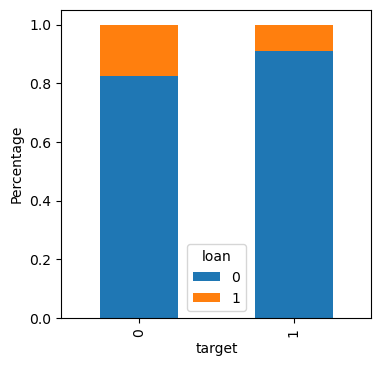

In [29]:
print(pd.crosstab(data["target"],data["loan"]))
t = pd.crosstab(data["target"],data["loan"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

default     0   1
target           
0        5202  87
1        5237  52


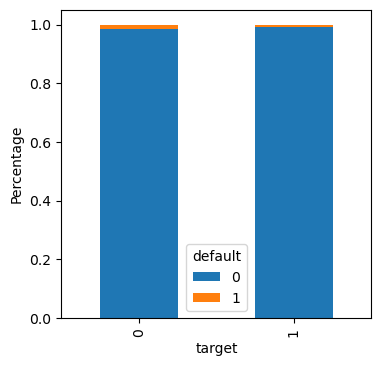

In [30]:
print(pd.crosstab(data["target"],data["default"]))
t = pd.crosstab(data["target"],data["default"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

In [31]:
#Prueba Chi-Cuadrado
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables

In [32]:
contigencia = pd.crosstab(data['target'], data['housing']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

3.557728213453099e-116


In [33]:
contigencia = pd.crosstab(data['target'], data['loan']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

4.921141785848781e-37


In [34]:
#Al 95% de confianza, existe dependencia entre el target y las variables housing y loan.

In [35]:
contigencia = pd.crosstab(data['target'], data['default']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

0.0036963177458966233


In [36]:
#Defaul es una variable filtro

### Preparación de los datos 

In [37]:
data['c_housing'] = LabelEncoder().fit_transform(data.housing.values)
data['c_loan'] = LabelEncoder().fit_transform(data.loan.values)
data['c_default'] = LabelEncoder().fit_transform(data.default.values)

In [38]:
data.head()

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra,c_housing,c_loan,c_default
0,1,261,0,1,1,0,0,0,1,1,0,0
1,2,50,0,1,1,0,0,0,1,1,0,0
2,3,1492,0,1,1,0,0,0,1,1,0,0
3,4,104,0,1,1,0,0,0,1,1,0,0
4,5,13,0,1,1,0,0,0,1,1,0,0


In [39]:
X = data[['c_housing','c_loan','duration']]
y = data['target']

In [40]:
X = X.to_numpy()

In [41]:
X[0:5]

array([[   1,    0,  261],
       [   1,    0,   50],
       [   1,    0, 1492],
       [   1,    0,  104],
       [   1,    0,   13]], dtype=int64)

In [42]:
y = y.to_numpy()

In [43]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [45]:
X_train[0:5]

array([[   1,    0, 1080],
       [   1,    0,  204],
       [   0,    0,  140],
       [   0,    0,  373],
       [   0,    0,  194]], dtype=int64)

In [46]:
X_test[0:5]

array([[  0,   0, 263],
       [  0,   0, 597],
       [  0,   0, 150],
       [  0,   0, 917],
       [  1,   0, 404]], dtype=int64)

In [47]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [48]:
X_train[0:5]

array([[ 1.05317258, -0.39338138,  2.00876968],
       [ 1.05317258, -0.39338138, -0.50165504],
       [-0.949512  , -0.39338138, -0.68506507],
       [-0.949512  , -0.39338138, -0.01733795],
       [-0.949512  , -0.39338138, -0.53031286]])

In [49]:
X_test[0:5]

array([[-0.97941782, -0.39051946, -0.32766412],
       [-0.97941782, -0.39051946,  0.63785382],
       [-0.97941782, -0.39051946, -0.65432139],
       [-0.97941782, -0.39051946,  1.56290095],
       [ 1.02101471, -0.39051946,  0.07993477]])

### Modelado

In [49]:
#SVM
#classifier = SVC(kernel='linear',probability=True).fit(X_train, y_train)
#classifier = SVC(kernel='poly',probability=True).fit(X_train, y_train)
#classifier = SVC(kernel='rbf',probability=True).fit(X_train, y_train)
#classifier = SVC(kernel='sigmoid',probability=True).fit(X_train, y_train)

In [50]:
#Validación Cruzada
cv_scores = cross_val_score(SVC(kernel='linear',probability=True),X_train,y_train,cv=5)

In [51]:
#Accuracy
print(cv_scores)

[0.76432369 0.76373302 0.75591017 0.77304965 0.76122931]


In [52]:
#Accuracy Promedio
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.7636491658742227


In [53]:
#Tuning
#param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
param_grid = {'C': [0.1,1,5,10,50,100], 
              'gamma': [2,1.5,1,0.1,0.01,0.001],
              'kernel': ['rbf']}

In [52]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time=   2.7s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   2.7s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   2.8s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   2.8s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   2.8s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV] END .........................C=0.1, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'gamma': [2, 1.5, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [53]:
print(grid.best_estimator_)

SVC(C=10, gamma=2)


In [54]:
#SVM
classifier = SVC(kernel='rbf',C = 10,gamma = 2,probability=True).fit(X_train, y_train)

### Evaluación 

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
y_pred[0:20]

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [57]:
y_test[0:20]

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [58]:
confusion_matrix(y_test, y_pred)

array([[791, 238],
       [240, 847]], dtype=int64)

Confusion matrix, without normalization
[[791 238]
 [240 847]]
Normalized confusion matrix
[[0.76870748 0.23129252]
 [0.22079117 0.77920883]]


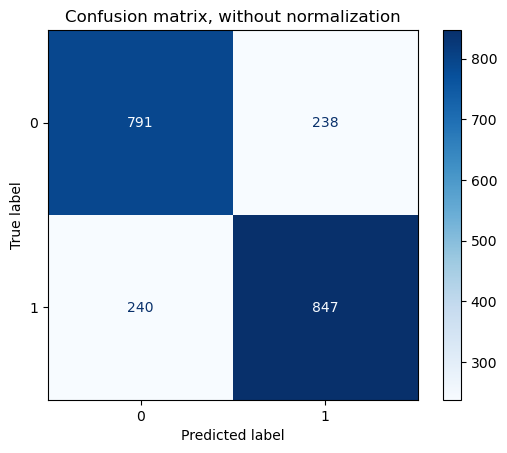

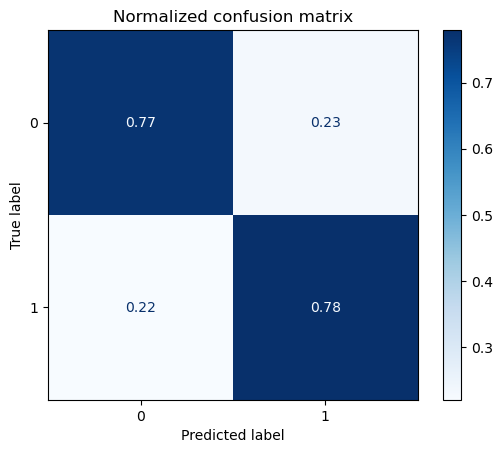

In [59]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
#ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [60]:
y_pred_prob = classifier.predict_proba(X_test)

In [61]:
y_pred_prob[0:5]

array([[0.18556585, 0.81443415],
       [0.202735  , 0.797265  ],
       [0.55516251, 0.44483749],
       [0.20095782, 0.79904218],
       [0.62742124, 0.37257876]])

In [62]:
y_pred_prob[0:5,1]

array([0.81443415, 0.797265  , 0.44483749, 0.79904218, 0.37257876])

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [64]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8224457610616858

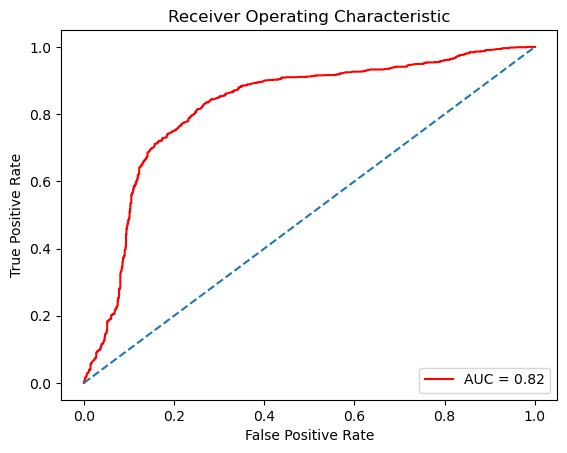

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1029
           1       0.78      0.78      0.78      1087

    accuracy                           0.77      2116
   macro avg       0.77      0.77      0.77      2116
weighted avg       0.77      0.77      0.77      2116



In [67]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [68]:
dataf.head(5)

,0,1,2,0,0,0,1
0,-0.979418,-0.390519,-0.327664,1,1,0.185566,0.814434
1,-0.979418,-0.390519,0.637854,1,1,0.202735,0.797265
2,-0.979418,-0.390519,-0.654321,0,0,0.555163,0.444837
3,-0.979418,-0.390519,1.562901,1,1,0.200958,0.799042
4,1.021015,-0.390519,0.079935,1,0,0.627421,0.372579


In [69]:
dataf.columns = ['c_housing','c_loan','duration','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [70]:
dataf.head()

,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,-0.979418,-0.390519,-0.327664,1,1,0.185566,0.814434
1,-0.979418,-0.390519,0.637854,1,1,0.202735,0.797265
2,-0.979418,-0.390519,-0.654321,0,0,0.555163,0.444837
3,-0.979418,-0.390519,1.562901,1,1,0.200958,0.799042
4,1.021015,-0.390519,0.079935,1,0,0.627421,0.372579


In [71]:
quantiles = dataf['Target_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.188148
0.4    0.218978
0.6    0.793142
0.8    0.799686
Name: Target_Pred_Prob_1, dtype: float64

In [72]:
dataf.to_csv('D:/dataf.csv', index = False)

### Implementación

Se puede exportar el modelo más adecuado para ponerlo en un ambiente de producción. A partir de ello se puede generar un API para alimentar una aplicación web o móvil.

A continuación se exportará el modelo más adecuado.

In [72]:
import pickle

In [75]:
Pkl_Filename = "D:/classifier.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(classifier, file)

### Tarea

1.Para la base de datos dataf, colocar los valores originales de las primeras 3 variables.


2.Para la base de datos dataf, crear una variable "score", con las categorías: Muy alto, alto, medio, bajo y muy bajo.
(Usar: Target_Pred_Prob_1)